In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_data(filename="parallel.csv",
            data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"):
    data = pd.read_csv(data_dir + filename, sep=";").to_numpy() # .groupby("realization")
    #print(data)
    print(f"Shape = {data.shape}, Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]")
    print(f"Number of realizations = {data[-1,0]}")
    
    iterations = len(np.unique(data[:,0]))
    data = np.array([data[data[:,0]==i] for i in range(iterations)]) # contains shape=(realizations, it/re, values)
    print(f"Reshaped = {data.shape}\n")
    return data

Shape = (5010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 501, 8)

Shape = (5010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 501, 8)



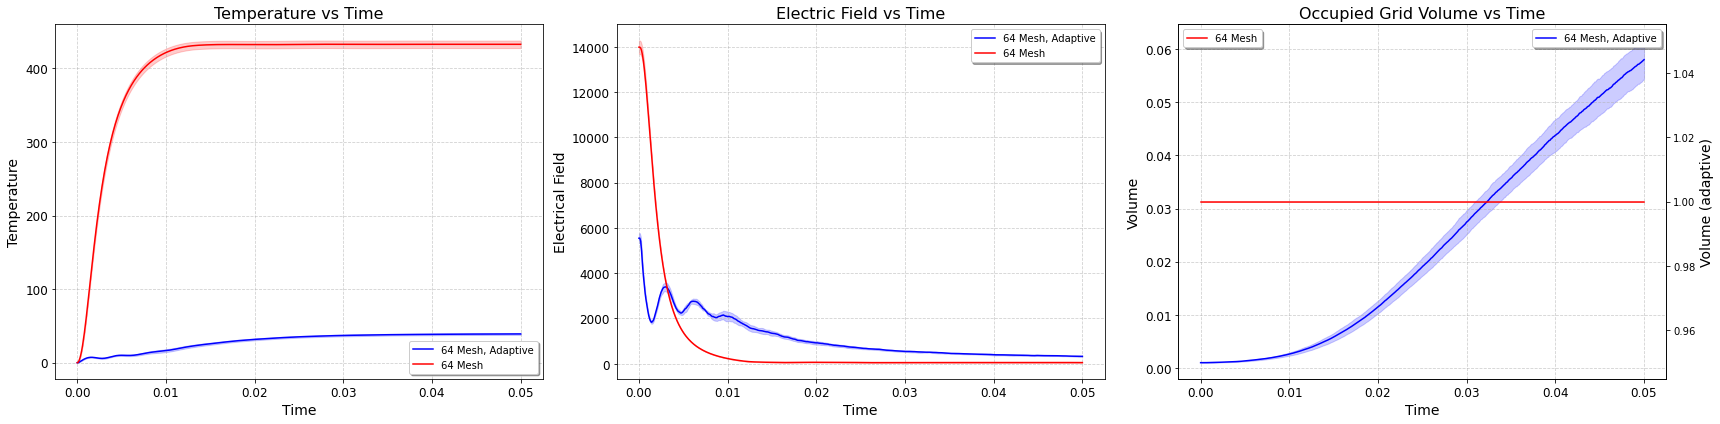

In [2]:
# Load the first dataset
data1 = get_data(filename="1722029017463_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")
# Load the second dataset
data2 = get_data(filename="1722029000667_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")
'''data1 = get_data(filename="1722029921496_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")
# Load the second dataset
data2 = get_data(filename="1722029951122_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")'''

# Extract time, temperature, electric field, and voltage from the first dataset
time1 = data1[0, :, 1]
T1 = (data1[..., 2] + data1[..., 3] + data1[..., 4]) / 3
E1 = data1[..., 5]
V1 = data1[..., 6]  # Assuming V1 is in the 8th column

# Extract time, temperature, electric field, and voltage from the second dataset
time2 = data2[0, :, 1]
T2 = (data2[..., 2] + data2[..., 3] + data2[..., 4]) / 3
E2 = data2[..., 5]
V2 = data2[..., 6]  # Assuming V2 is in the 8th column

# Calculate means and standard deviations for Temperature
T1_mean = T1.mean(axis=0)
T1_std = T1.std(axis=0)

T2_mean = T2.mean(axis=0)
T2_std = T2.std(axis=0)

# Calculate means and standard deviations for Electric Field
E1_mean = E1.mean(axis=0)
E1_std = E1.std(axis=0)

E2_mean = E2.mean(axis=0)
E2_std = E2.std(axis=0)

# Calculate means and standard deviations for Voltage
V1_mean = V1.mean(axis=0)
V1_std = V1.std(axis=0)

V2_mean = V2.mean(axis=0)
V2_std = V2.std(axis=0)

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns

# Plot Temperature vs Time for both datasets
axs[0].plot(time1, T1_mean, color='blue', label='64 Mesh, Adaptive')
axs[0].fill_between(time1, T1_mean - T1_std, T1_mean + T1_std, color='blue', alpha=0.2)
axs[0].plot(time2, T2_mean, color='red', label='64 Mesh')
axs[0].fill_between(time2, T2_mean - T2_std, T2_mean + T2_std, color='red', alpha=0.2)
axs[0].set_title('Temperature vs Time', fontsize=16)
axs[0].set_xlabel('Time', fontsize=14)
axs[0].set_ylabel('Temperature', fontsize=14)
axs[0].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].tick_params(axis='both', labelsize=12)

# Plot Electric Field vs Time for both datasets
axs[1].plot(time1, E1_mean, color='blue', label='64 Mesh, Adaptive')
axs[1].fill_between(time1, E1_mean - E1_std, E1_mean + E1_std, color='blue', alpha=0.2)
axs[1].plot(time2, E2_mean, color='red', label='64 Mesh')
axs[1].fill_between(time2, E2_mean - E2_std, E2_mean + E2_std, color='red', alpha=0.2)
axs[1].set_title('Electric Field vs Time', fontsize=16)
axs[1].set_xlabel('Time', fontsize=14)
axs[1].set_ylabel('Electrical Field', fontsize=14)
axs[1].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].tick_params(axis='both', labelsize=12)

# Plot Voltage vs Time for both datasets with dual y-axes
axs[2].plot(time1, V1_mean, color='blue', label='64 Mesh, Adaptive')
axs[2].fill_between(time1, V1_mean - V1_std, V1_mean + V1_std, color='blue', alpha=0.2)
axs[2].set_title('Occupied Grid Volume vs Time', fontsize=16)
axs[2].set_xlabel('Time', fontsize=14)
axs[2].set_ylabel('Volume', fontsize=14)
axs[2].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[2].grid(True, linestyle='--', alpha=0.6)
axs[2].tick_params(axis='both', labelsize=12)

# Create a second y-axis for V2
ax2 = axs[2].twinx()
ax2.plot(time2, V2_mean, color='red', label='64 Mesh')
ax2.fill_between(time2, V2_mean - V2_std, V2_mean + V2_std, color='red', alpha=0.2)
ax2.set_ylabel('Volume (adaptive)', fontsize=14)
ax2.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('plots/T_E_V_comparison_adaptive_mesh.pdf', dpi=300)

# Show the combined plots
plt.show()



Shape = (200400, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 399.0
Reshaped = (400, 501, 8)

Shape = (200400, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 399.0
Reshaped = (400, 501, 8)

Shape = (200400, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 399.0
Reshaped = (400, 501, 8)



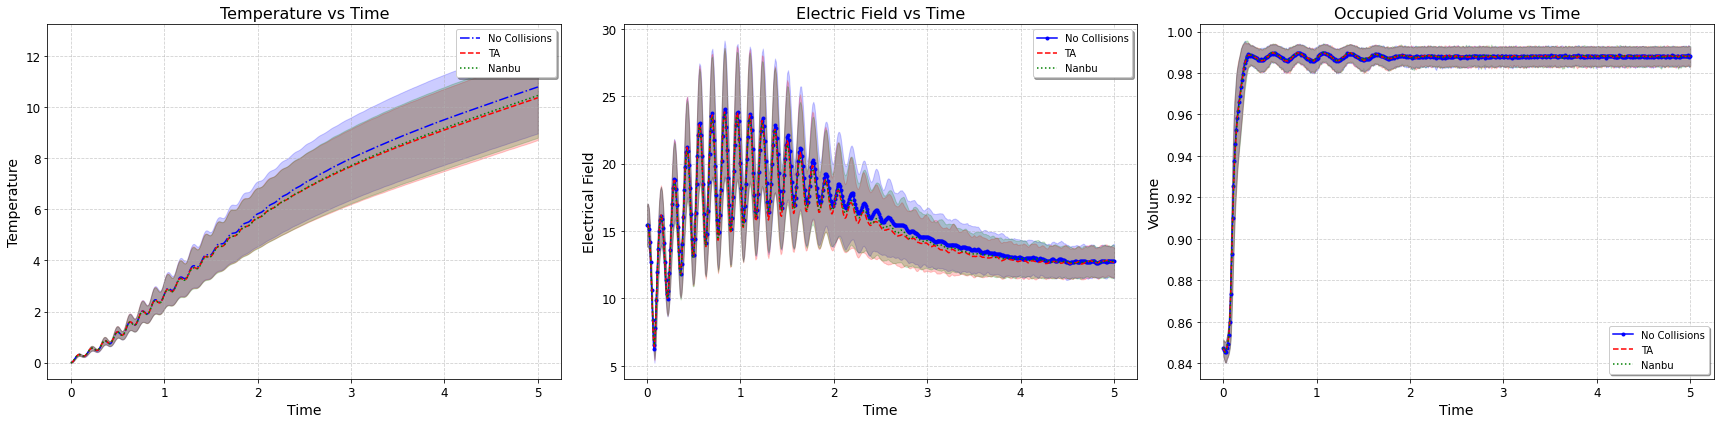

In [3]:
# Load the first dataset
'''data1 = get_data(filename="1722031867122_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")
# Load the second dataset
data2 = get_data(filename="1722031863872_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")
data3 = get_data(filename="1722031859731_Nanbu_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")'''
    
data1 = get_data(filename="1722039371417_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")
# Load the second dataset
data2 = get_data(filename="1722039380700_TakAbe_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")
data3 = get_data(filename="1722039390279_Nanbu_delta.csv", 
                  #data_dir="//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/")
                 data_dir="data/delta/")

# Extract time, temperature, electric field, and voltage from the first dataset
time1 = data1[0, :, 1]
T1 = (data1[..., 2] + data1[..., 3] + data1[..., 4]) / 3
E1 = data1[..., 5]
V1 = data1[..., 6]  # Assuming V1 is in the 8th column

# Extract time, temperature, electric field, and voltage from the second dataset
time2 = data2[0, :, 1]
T2 = (data2[..., 2] + data2[..., 3] + data2[..., 4]) / 3
E2 = data2[..., 5]
V2 = data2[..., 6]  # Assuming V2 is in the 8th column

# Extract time, temperature, electric field, and voltage from the third dataset
time3 = data3[0, :, 1]
T3 = (data3[..., 2] + data3[..., 3] + data3[..., 4]) / 3
E3 = data3[..., 5]
V3 = data3[..., 6]  # Assuming V3 is in the 8th column

# Calculate means and standard deviations for Temperature
T1_mean = T1.mean(axis=0)
T1_std = T1.std(axis=0)

T2_mean = T2.mean(axis=0)
T2_std = T2.std(axis=0)

T3_mean = T3.mean(axis=0)
T3_std = T3.std(axis=0)

# Calculate means and standard deviations for Electric Field
E1_mean = E1.mean(axis=0)
E1_std = E1.std(axis=0)

E2_mean = E2.mean(axis=0)
E2_std = E2.std(axis=0)

E3_mean = E3.mean(axis=0)
E3_std = E3.std(axis=0)

# Calculate means and standard deviations for Voltage
V1_mean = V1.mean(axis=0)
V1_std = V1.std(axis=0)

V2_mean = V2.mean(axis=0)
V2_std = V2.std(axis=0)

V3_mean = V3.mean(axis=0)
V3_std = V3.std(axis=0)

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns

# Plot Temperature vs Time for all datasets
axs[0].plot(time1, T1_mean, "-.", color='blue', label='No Collisions')
axs[0].fill_between(time1, T1_mean - T1_std, T1_mean + T1_std, color='blue', alpha=0.2)
axs[0].plot(time2, T2_mean, "--", color='red', label='TA')
axs[0].fill_between(time2, T2_mean - T2_std, T2_mean + T2_std, color='red', alpha=0.2)
axs[0].plot(time3, T3_mean, ":", color='green', label='Nanbu')
axs[0].fill_between(time3, T3_mean - T3_std, T3_mean + T3_std, color='green', alpha=0.2)
axs[0].set_title('Temperature vs Time', fontsize=16)
axs[0].set_xlabel('Time', fontsize=14)
axs[0].set_ylabel('Temperature', fontsize=14)
axs[0].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].tick_params(axis='both', labelsize=12)

# Plot Electric Field vs Time for all datasets
axs[1].plot(time1, E1_mean, ".-", color='blue', label='No Collisions')
axs[1].fill_between(time1, E1_mean - E1_std, E1_mean + E1_std, color='blue', alpha=0.2)
axs[1].plot(time2, E2_mean, "--", color='red', label='TA')
axs[1].fill_between(time2, E2_mean - E2_std, E2_mean + E2_std, color='red', alpha=0.2)
axs[1].plot(time3, E3_mean, ":", color='green', label='Nanbu')
axs[1].fill_between(time3, E3_mean - E3_std, E3_mean + E3_std, color='green', alpha=0.2)
axs[1].set_title('Electric Field vs Time', fontsize=16)
axs[1].set_xlabel('Time', fontsize=14)
axs[1].set_ylabel('Electrical Field', fontsize=14)
axs[1].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].tick_params(axis='both', labelsize=12)

# Plot Voltage vs Time for all datasets on a single y-axis
axs[2].plot(time1, V1_mean, ".-", color='blue', label='No Collisions')
axs[2].fill_between(time1, V1_mean - V1_std, V1_mean + V1_std, color='blue', alpha=0.2)
axs[2].plot(time2, V2_mean, "--", color='red', label='TA')
axs[2].fill_between(time2, V2_mean - V2_std, V2_mean + V2_std, color='red', alpha=0.2)
axs[2].plot(time3, V3_mean, ":", color='green', label='Nanbu')
axs[2].fill_between(time3, V3_mean - V3_std, V3_mean + V3_std, color='green', alpha=0.2)
axs[2].set_title('Occupied Grid Volume vs Time', fontsize=16)
axs[2].set_xlabel('Time', fontsize=14)
axs[2].set_ylabel('Volume', fontsize=14)
axs[2].legend(loc='best', frameon=True, fancybox=True, shadow=True)
axs[2].grid(True, linestyle='--', alpha=0.6)
axs[2].tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('plots/T_E_V_comparison_collision_algos.pdf', dpi=300)

# Show the combined plots
plt.show()


Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 401, 8)

Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 401, 8)

Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 401, 8)

Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 401, 8)

Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 401, 8)

Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 401, 8)

Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
Reshaped = (10, 401, 8)

Shape = (4010, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 9.0
R

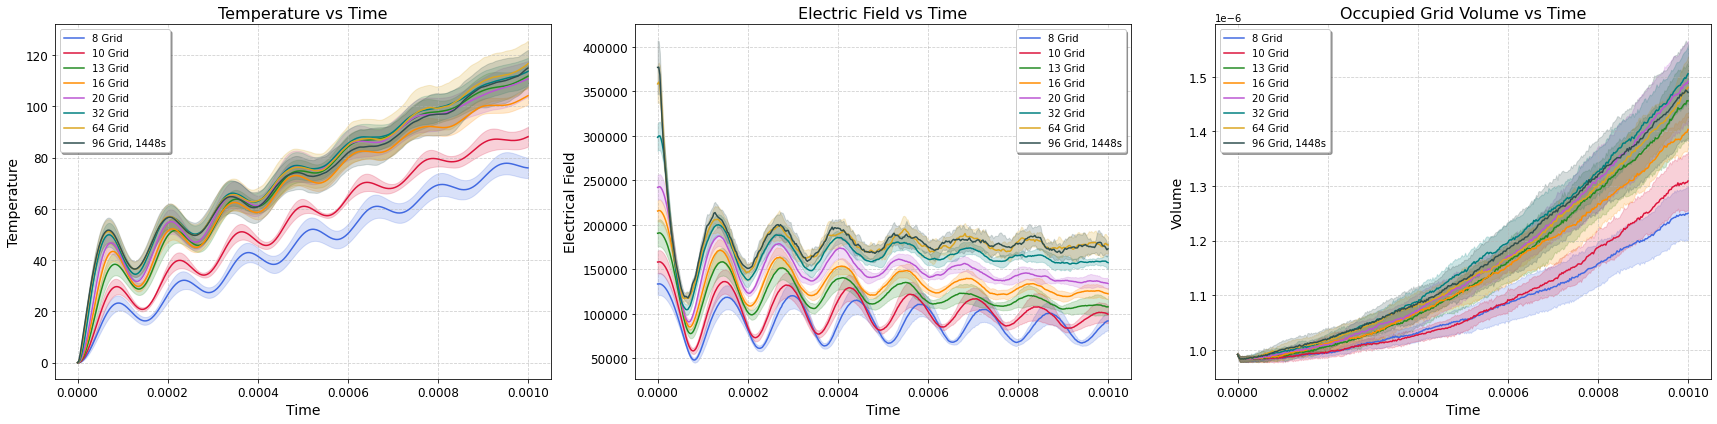

In [10]:
# List of filenames and their corresponding labels
file_info = [
    ("1722041259058_Nanbu_delta.csv", "8 Grid", "royalblue", "-"),
    ("1722041897899_Nanbu_delta.csv", "10 Grid", "crimson", "-"),
    ("1722041933161_Nanbu_delta.csv", "13 Grid", "forestgreen", "-"),
    ("1722041257455_Nanbu_delta.csv", "16 Grid", "darkorange", "-"),
    ("1722041808201_Nanbu_delta.csv", "20 Grid", "mediumorchid", "-"),
    ("1722041255264_Nanbu_delta.csv", "32 Grid", "teal", "-"),
    ("1722041267151_Nanbu_delta.csv", "64 Grid", "goldenrod", "-"),
    ("1722041293148_Nanbu_delta.csv", "96 Grid, 1448s", "darkslategray", "-")
   # ("1722041316483_Nanbu_delta.csv", "128 Grid", "brown", "-")
]

#data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"
data_dir = "data/delta/"

# Initialize lists to store data for all files
all_time = []
all_T_mean = []
all_T_std_err = []
all_E_mean = []
all_E_std_err = []
all_V_mean = []
all_V_std_err = []

# Load data and calculate statistics for each file
for filename, label, color, linestyle in file_info:
    data = get_data(filename=filename, data_dir=data_dir)
    
    time = data[0, :, 1]
    T = (data[..., 2] + data[..., 3] + data[..., 4]) / 3
    E = data[..., 5]
    V = data[..., 6]
    
    T_mean = T.mean(axis=0)
    T_std_err = T.std(axis=0) #/ np.sqrt(T.shape[0])
    
    E_mean = E.mean(axis=0)
    E_std_err = E.std(axis=0) #/ np.sqrt(E.shape[0])
    
    V_mean = V.mean(axis=0)
    V_std_err = V.std(axis=0) #/ np.sqrt(V.shape[0])
    
    all_time.append(time)
    all_T_mean.append(T_mean)
    all_T_std_err.append(T_std_err)
    all_E_mean.append(E_mean)
    all_E_std_err.append(E_std_err)
    all_V_mean.append(V_mean)
    all_V_std_err.append(V_std_err)

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Titles and labels for the subplots
titles = ['Temperature vs Time', 'Electric Field vs Time', 'Occupied Grid Volume vs Time']
y_labels = ['Temperature', 'Electrical Field', 'Volume']

# Plot data for each file in each subplot
for i, (ax, title, y_label) in enumerate(zip(axs, titles, y_labels)):
    for j, (filename, label, color, linestyle) in enumerate(file_info):
        ax.plot(all_time[j], all_T_mean[j] if i == 0 else all_E_mean[j] if i == 1 else all_V_mean[j],
                linestyle, color=color, label=label)
        ax.fill_between(all_time[j],
                        (all_T_mean[j] - all_T_std_err[j]) if i == 0 else 
                        (all_E_mean[j] - all_E_std_err[j]) if i == 1 else 
                        (all_V_mean[j] - all_V_std_err[j]),
                        (all_T_mean[j] + all_T_std_err[j]) if i == 0 else 
                        (all_E_mean[j] + all_E_std_err[j]) if i == 1 else 
                        (all_V_mean[j] + all_V_std_err[j]),
                        color=color, alpha=0.2)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as an image file
plt.savefig('plots/T_E_V_comparison_grid_sizing.pdf', dpi=300)

# Show the combined plots
plt.show()

Shape = (20100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 201, 8)

Shape = (40100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 401, 8)

Shape = (80100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 801, 8)

Shape = (160100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 1601, 8)

Shape = (320100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 3201, 8)



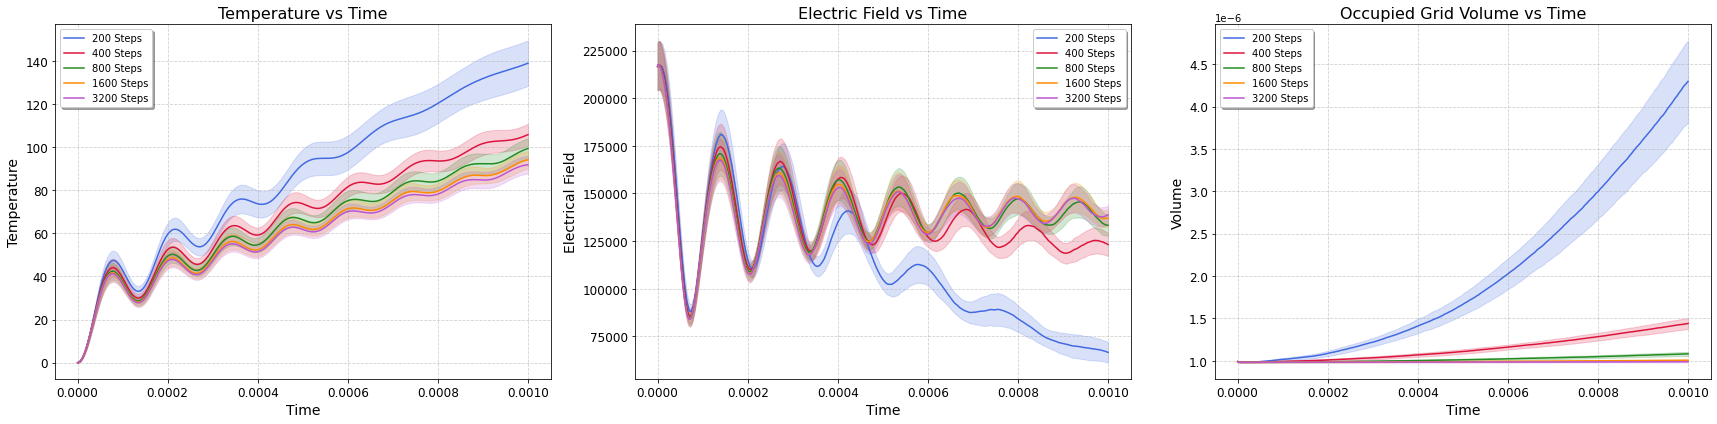

In [7]:
# List of filenames and their corresponding labels
file_info = [
    ("1722043710897_Nanbu_delta.csv", "200 Steps", "royalblue", 200),
    ("1722043718337_Nanbu_delta.csv", "400 Steps", "crimson", 400),
    ("1722043723978_Nanbu_delta.csv", "800 Steps", "forestgreen", 800),
    ("1722043733577_Nanbu_delta.csv", "1600 Steps", "darkorange", 1600),
    ("1722043758810_Nanbu_delta.csv", "3200 Steps", "mediumorchid", 3200)
    #("1722041255264_Nanbu_delta.csv", "32 Grid", "teal", 32),
    #("1722041267151_Nanbu_delta.csv", "64 Grid", "goldenrod", 64),
    #("1722041293148_Nanbu_delta.csv", "96 Grid", "darkslategray", 96)
]

#data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"
data_dir = "data/delta/"

# Initialize lists to store data for all files
all_time = []
all_T_mean = []
all_T_std_err = []
all_E_mean = []
all_E_std_err = []
all_V_mean = []
all_V_std_err = []

# Load data and calculate statistics for each file
for filename, label, color, linestyle in file_info:
    data = get_data(filename=filename, data_dir=data_dir)
    
    time = data[0, :, 1]
    T = (data[..., 2] + data[..., 3] + data[..., 4]) / 3
    E = data[..., 5]
    V = data[..., 6]
    
    T_mean = T.mean(axis=0)
    T_std_err = T.std(axis=0) #/ np.sqrt(T.shape[0])
    
    E_mean = E.mean(axis=0)
    E_std_err = E.std(axis=0) #/ np.sqrt(E.shape[0])
    
    V_mean = V.mean(axis=0)
    V_std_err = V.std(axis=0) #/ np.sqrt(V.shape[0])
    
    all_time.append(time)
    all_T_mean.append(T_mean)
    all_T_std_err.append(T_std_err)
    all_E_mean.append(E_mean)
    all_E_std_err.append(E_std_err)
    all_V_mean.append(V_mean)
    all_V_std_err.append(V_std_err)

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Titles and labels for the subplots
titles = ['Temperature vs Time', 'Electric Field vs Time', 'Occupied Grid Volume vs Time']
y_labels = ['Temperature', 'Electrical Field', 'Volume']

# Plot data for each file in each subplot
for i, (ax, title, y_label) in enumerate(zip(axs, titles, y_labels)):
    for j, (filename, label, color, linestyle) in enumerate(file_info):
        ax.plot(all_time[j], all_T_mean[j] if i == 0 else all_E_mean[j] if i == 1 else all_V_mean[j],
                color=color, label=label)
        ax.fill_between(all_time[j],
                        (all_T_mean[j] - all_T_std_err[j]) if i == 0 else 
                        (all_E_mean[j] - all_E_std_err[j]) if i == 1 else 
                        (all_V_mean[j] - all_V_std_err[j]),
                        (all_T_mean[j] + all_T_std_err[j]) if i == 0 else 
                        (all_E_mean[j] + all_E_std_err[j]) if i == 1 else 
                        (all_V_mean[j] + all_V_std_err[j]),
                        color=color, alpha=0.2)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as an image file
plt.savefig('plots/T_E_V_comparison_timestepsize.pdf', dpi=300)

# Show the combined plots
plt.show()

Shape = (20100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 201, 8)

Shape = (40100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 401, 8)

Shape = (80100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 801, 8)

Shape = (160100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 1601, 8)

Shape = (320100, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 99.0
Reshaped = (100, 3201, 8)



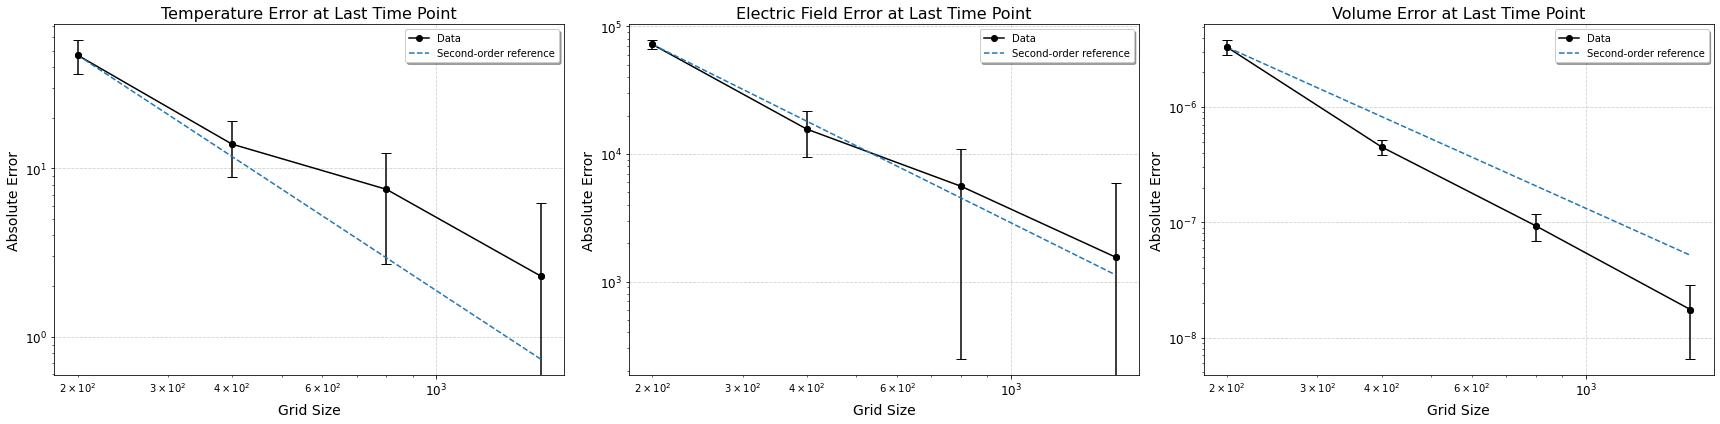

In [6]:
# List of filenames and their corresponding labels
file_info = [
    ("1722043710897_Nanbu_delta.csv", "200 Steps", "royalblue", 200),
    ("1722043718337_Nanbu_delta.csv", "400 Steps", "crimson", 400),
    ("1722043723978_Nanbu_delta.csv", "800 Steps", "forestgreen", 800),
    ("1722043733577_Nanbu_delta.csv", "1600 Steps", "darkorange", 1600),
    ("1722043758810_Nanbu_delta.csv", "3200 Steps", "mediumorchid", 3200),
    #("1722041255264_Nanbu_delta.csv", "32 Grid", "teal", 32),
    #("1722041267151_Nanbu_delta.csv", "64 Grid", "goldenrod", 64),
    #("1722041293148_Nanbu_delta.csv", "96 Grid", "darkslategray", 96)
]

#data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"
data_dir = "data/delta/"

# Initialize lists to store data for all files
all_grid_sizes = []
all_T_mean = []
all_E_mean = []
all_V_mean = []
all_T_std = []
all_E_std = []
all_V_std = []

# Load data and calculate statistics for each file
for filename, label, color, grid_size in file_info:
    data = get_data(filename=filename, data_dir=data_dir)
    
    time = data[0, :, 1]
    T = (data[..., 2] + data[..., 3] + data[..., 4]) / 3
    E = data[..., 5]
    V = data[..., 6]
    
    T_mean = T.mean(axis=0)
    E_mean = E.mean(axis=0)
    V_mean = V.mean(axis=0)
    
    T_std = T.std(axis=0)
    E_std = E.std(axis=0)
    V_std = V.std(axis=0)
    
    all_grid_sizes.append(grid_size)
    all_T_mean.append(T_mean)
    all_E_mean.append(E_mean)
    all_V_mean.append(V_mean)
    all_T_std.append(T_std)
    all_E_std.append(E_std)
    all_V_std.append(V_std)

# Get the finest solution (assumed to be the last one)
T_finest = all_T_mean[-1]
E_finest = all_E_mean[-1]
V_finest = all_V_mean[-1]

# Calculate point-wise errors at the last time point
T_errors = [np.abs(T[-1] - T_finest[-1]) for T in all_T_mean[:-1]]
E_errors = [np.abs(E[-1] - E_finest[-1]) for E in all_E_mean[:-1]]
V_errors = [np.abs(V[-1] - V_finest[-1]) for V in all_V_mean[:-1]]

# Calculate standard deviations for the last time point
T_error_stds = [T_std[-1] for T_std in all_T_std[:-1]]
E_error_stds = [E_std[-1] for E_std in all_E_std[:-1]]
V_error_stds = [V_std[-1] for V_std in all_V_std[:-1]]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Titles and labels for the subplots
titles = ['Temperature Error at Last Time Point', 'Electric Field Error at Last Time Point', 'Volume Error at Last Time Point']
y_labels = ['Absolute Error', 'Absolute Error', 'Absolute Error']

# Plot data for each metric
for ax, title, y_label, errors, error_stds in zip(axs, titles, y_labels, [T_errors, E_errors, V_errors], 
                                                   [T_error_stds, E_error_stds, V_error_stds]):
    ax.loglog(all_grid_sizes[:-1], errors, 'o-', label='Data', color='black')
    
    # Add error bars
    ax.errorbar(all_grid_sizes[:-1], errors, yerr=error_stds, fmt='o', color='black', capsize=5)
    
    # Add second-order convergence reference line
    x_ref = np.array([min(all_grid_sizes[:-1]), max(all_grid_sizes[:-1])])
    y_ref = errors[0] * (x_ref[0] / x_ref) ** 2
    ax.loglog(x_ref, y_ref, '--', label='Second-order reference')
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Grid Size', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as an image file
plt.savefig('plots/T_E_V_comparison_timestepsize_errors.pdf', dpi=300)

# Show the combined plots
plt.show()


Shape = (501, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 0.0
Reshaped = (1, 501, 8)

Shape = (501, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 0.0
Reshaped = (1, 501, 8)



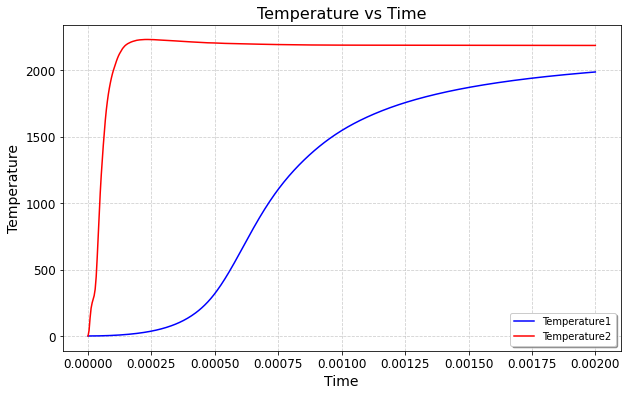

False


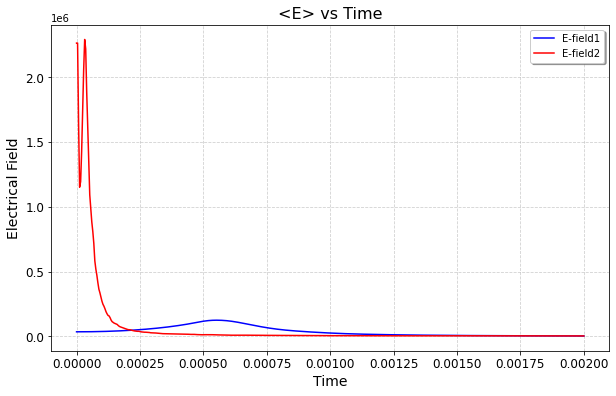

In [370]:
#data1 = get_data(filename="1722029776157_TakAbe_delta.csv")
#data2 = get_data(filename="1722029823418_TakAbe_delta.csv")
data1 = get_data(filename="1722029776157_TakAbe_delta.csv")
data2 = get_data(filename="1722029823418_TakAbe_delta.csv")

time1 = data1[0,:,1]
T1    = (data1[...,2] + data1[...,3] + data1[...,4]) / 3
#E1    = data1[...,6]**(1/3)*64 #/ data1[...,7] # / data1[...,8] # data1[...,7]#
E1 = data1[...,5]

time2 = data2[0,:,1]
T2    = (data2[...,2] + data2[...,3] + data2[...,4]) / 3
#E2    = data2[...,6]**(1/3)*64 #/ data2[...,7]# / data2[...,8] # data2[...,7]#
E2 = data2[...,5]
#T_mean = T.mean(axis=0)
#T_std  = T.std(axis=0) # (np.abs(T-T_mean)).max(axis=0)
#E_mean = E.mean(axis=0)
#E_std  = E.std(axis=0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time1, T1[0], color='blue', label='Temperature1')
plt.plot(time2, T2[0], color='red', label='Temperature2')
#plt.fill_between(time, T_mean - T_std, T_mean + T_std, color='blue', alpha=0.2, label='Std Dev')


# Add titles and labels
plt.title('Temperature vs Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Save the plot as an image file (optional)
# plt.savefig('temperature_vs_time.pdf', dpi=300)
# Show the plot
plt.show()

print(all(sorted(E1[0], reverse=True) == E1[0]))

plt.figure(figsize=(10, 6))
plt.plot(time1, E1[0], color='blue', label='E-field1')
plt.plot(time2, E2[0], color='red', label='E-field2')
# plt.fill_between(time, E_mean - E_std, E_mean + E_std, color='blue', alpha=0.2, label='Std Dev')
# Add titles and labels
plt.title('<E> vs Time', fontsize=16)
#plt.ylim(0)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Electrical Field', fontsize=14)
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Shape = (8, 8), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 0.0
Reshaped = (1, 8, 8)



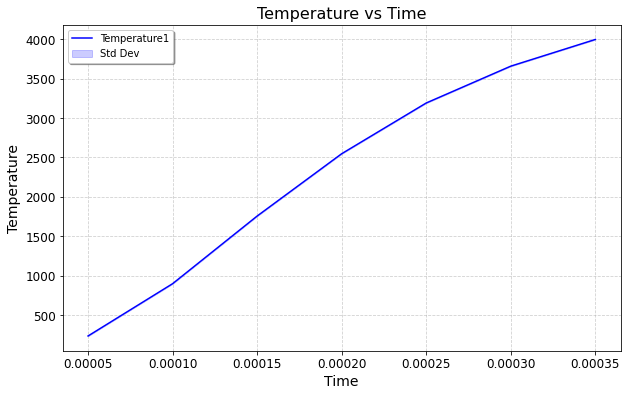

False


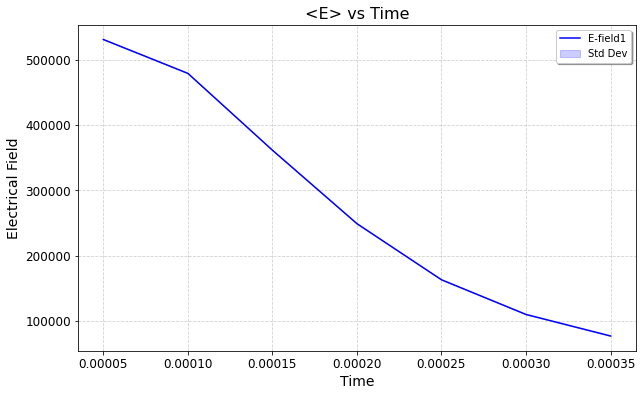

In [328]:
data1 = get_data(filename="1722014805305_Nanbu_delta.csv", 
                 data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_openmp/05.03.dsmc/dsmc-code-simple/data/")
  

time = data1[0,:,1]
T    = (data1[...,2] + data1[...,3] + data1[...,4]) / 3
#E1    = data1[...,6]**(1/3)*64 #/ data1[...,7] # / data1[...,8] # data1[...,7]#
E = data1[...,5]

T_mean = T.mean(axis=0)
T_std  = T.std(axis=0) # (np.abs(T-T_mean)).max(axis=0)
E_mean = E.mean(axis=0)
E_std  = E.std(axis=0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, T_mean, color='blue', label='Temperature1')
plt.fill_between(time, T_mean - T_std, T_mean + T_std, color='blue', alpha=0.2, label='Std Dev')


# Add titles and labels
plt.title('Temperature vs Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Save the plot as an image file (optional)
# plt.savefig('temperature_vs_time.pdf', dpi=300)
# Show the plot
plt.show()

print(all(sorted(E1[0], reverse=True) == E1[0]))

plt.figure(figsize=(10, 6))
plt.plot(time, E_mean, color='blue', label='E-field1')
plt.fill_between(time, E_mean - E_std, E_mean + E_std, color='blue', alpha=0.2, label='Std Dev')
# Add titles and labels
plt.title('<E> vs Time', fontsize=16)
#plt.ylim(0)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Electrical Field', fontsize=14)
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Shape = (49, 6), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 0.0
Reshaped = (1, 49, 6)



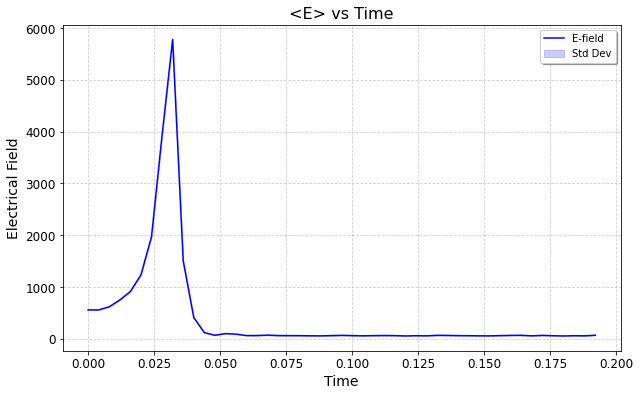

In [220]:
data = get_data(filename="500_Nanbu_delta_1000.csv")

time = data[0,:,1]
T    = (data[...,2] + data[...,3] + data[...,4]) / 3
E    = data[...,5]

E_mean = E.mean(axis=0)
E_std  = E.std(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time, E_mean, color='blue', label='E-field')
plt.fill_between(time, E_mean - E_std, E_mean + E_std, color='blue', alpha=0.2, label='Std Dev')
# Add titles and labels
plt.title('<E> vs Time', fontsize=16)
#plt.ylim(0)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Electrical Field', fontsize=14)
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Shape = (17, 6), Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]
Number of realizations = 0.0
Reshaped = (1, 17, 6)



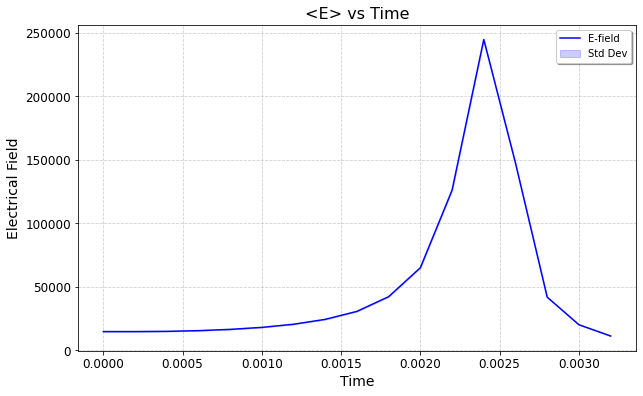

In [223]:
data = get_data(filename="500_Nanbu_delta_1000.csv")

time = data[0,:,1]
T    = (data[...,2] + data[...,3] + data[...,4]) / 3
E    = data[...,5]

E_mean = E.mean(axis=0)
E_std  = E.std(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time, E_mean, color='blue', label='E-field')
plt.fill_between(time, E_mean - E_std, E_mean + E_std, color='blue', alpha=0.2, label='Std Dev')
# Add titles and labels
plt.title('<E> vs Time', fontsize=16)
#plt.ylim(0)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Electrical Field', fontsize=14)
plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()